# Import, Clean, Preprocess

In [1]:
import pandas as pd

In [2]:
github_url = 'https://raw.githubusercontent.com/marymorkos/maternalmortalityhealthriskdata/main/Maternal%20Health%20Risk%20Data%20Set%204.csv'
maternal_df = pd.read_csv(github_url)

In [3]:
print(maternal_df.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [4]:
maternal_df.dropna(inplace=True)

In [5]:
print(maternal_df.duplicated().sum())

562


In [6]:
maternal_df.drop_duplicates(inplace=True)

In [7]:
maternal_df_encoded = pd.get_dummies(maternal_df, columns=['RiskLevel'])

# Visualize

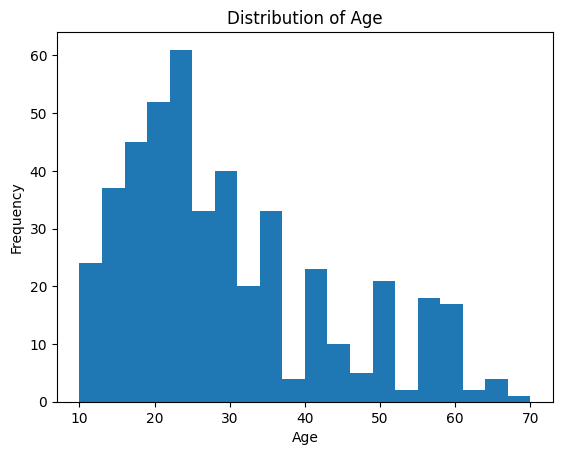

In [8]:
import matplotlib.pyplot as plt
plt.hist(maternal_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

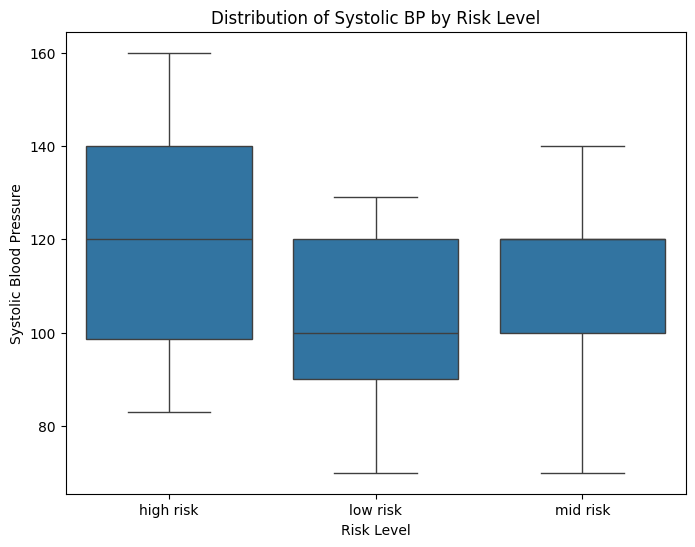

In [9]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='RiskLevel', y='SystolicBP', data=maternal_df)
plt.xlabel('Risk Level')
plt.ylabel('Systolic Blood Pressure')
plt.title('Distribution of Systolic BP by Risk Level')
plt.show()

# Prediction One(1): Random Forest Classifier

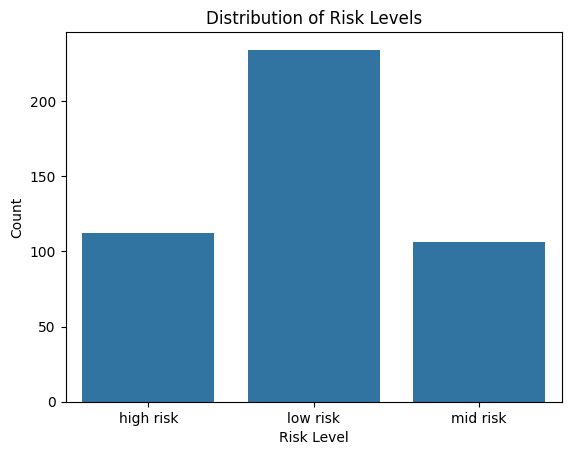

In [10]:
import seaborn as sns

sns.countplot(x='RiskLevel', data=maternal_df)
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.title('Distribution of Risk Levels')
plt.show()

In [11]:
X = maternal_df[['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = maternal_df['RiskLevel']

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6153846153846154
Confusion Matrix:
 [[12  2  4]
 [ 2 39  6]
 [ 3 18  5]]


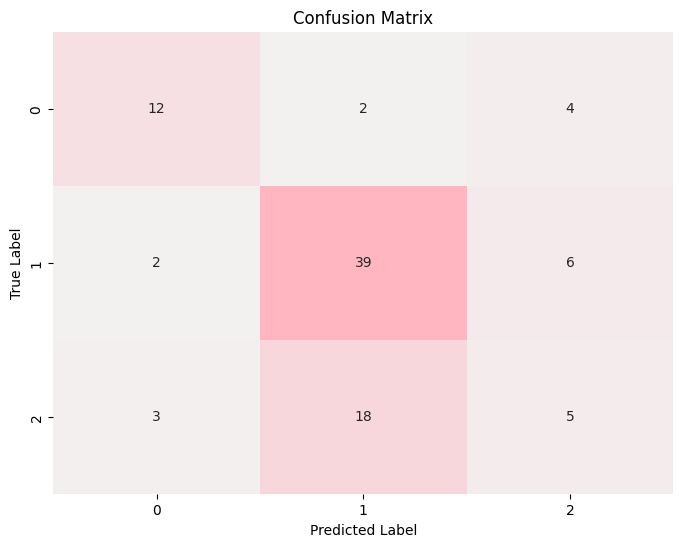

In [17]:
cmap = sns.light_palette("#FFB6C1", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap=cmap, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Predicition One (2): Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X = maternal_df[['SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = maternal_df['RiskLevel']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_pred_logreg = logreg_model.predict(X_test)

In [23]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

In [24]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

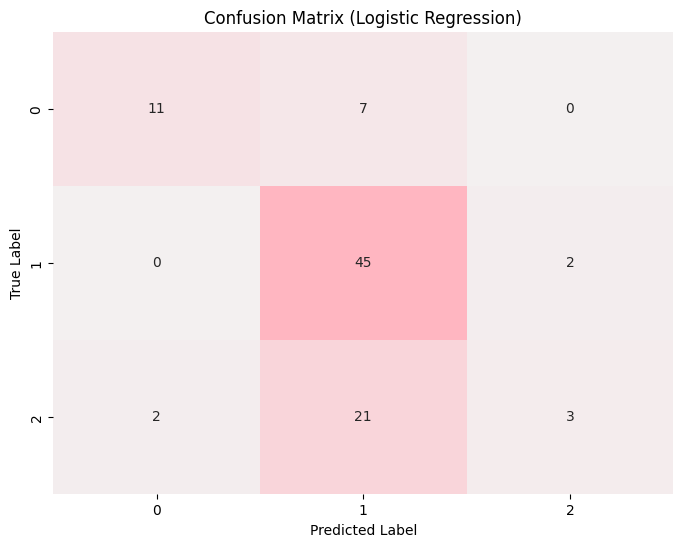

Accuracy (Logistic Regression): 0.6483516483516484


In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, cmap=cmap, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

print("Accuracy (Logistic Regression):", accuracy_logreg)

# Prediction Two (1): Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
X = maternal_df[['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate']]
y = maternal_df['BS']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_regression = regression_model.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred_regression)

In [32]:
print("Mean Squared Error:", mse)

Mean Squared Error: 6.853450449775311


# Prediction Two (2): Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [34]:
X = maternal_df[['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate']]
y = maternal_df['BS']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [37]:
y_pred_gb = gb_model.predict(X_test)

In [38]:
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Mean Squared Error (Gradient Boosting):", mse_gb)

Mean Squared Error (Gradient Boosting): 5.2540819170409865


# Prediction Two (3): Random Forest Regression

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
X = maternal_df[['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate']]
y = maternal_df['BS']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_pred_rf = rf_model.predict(X_test)

In [44]:
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Mean Squared Error (Random Forest):", mse_rf)

Mean Squared Error (Random Forest): 4.916121266146576


# Prediction Two (4): Support Vector Machine

In [45]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [46]:
X = maternal_df[['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate']]
y = maternal_df['BS']

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [49]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

SVR()

In [50]:
y_pred_svr = svr_model.predict(X_test)

In [51]:
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("Mean Squared Error (Support Vector Regression):", mse_svr)

Mean Squared Error (Support Vector Regression): 6.987860917915039


# Prediction Two (5): Random Forest Classifier

# New Section

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Define predictors and target
X = maternal_df[['Age', 'DiastolicBP', 'BodyTemp', 'BS', 'HeartRate']]
y = maternal_df['RiskLevel']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


In [54]:
print("Accuracy (Random Forest Classifier):", accuracy_rf)


Accuracy (Random Forest Classifier): 0.6483516483516484


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into predictors (X) and target variable (y)
X = maternal_df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = maternal_df['RiskLevel']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions on the testing data
predictions = model.predict(X_test)


In [56]:
# Calculating the accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6593406593406593
